# Linear Regression

Given a set of $m$ training examples $\left(x^{(i)}, y^{(i)}\right)$ for all $i\in[1,\ldots,m]$, a linear regression model is a supervised learning regression model which expresses $f(x^{(i)})=\hat{y}^{(i)}$ as a linear function of $x^{(i)}$ given parameters $w$ and $b$ as follows:
$$
    \hat{y}^{(i)}=w\cdot x^{(i)}+b
$$

The model is a supervised learning model because the training set contains the "*right*" or expected output value for the target variable for every $x^{(i)}$, and a regression model because the model outputs a continuous value.

Linear regression with one variable is known as a *univariate* linear regression, i.e, $x^{(i)}\in\mathbb{R}$ while *multivariate* linear regression is one wherein $x^{(i)}\in\mathbb{R}^{n}$ for $n>1$ features.

## Cost Function
The goal of the linear regression model is to find optimal parameters $\vec{w}$ and $b$ such that for every training example $\left(x^{(i)}, y^{(i)}\right)$ for $i\in[1,\ldots,m]$
$$
f(x^{(i)})\approx y^{(i)}
$$
Therefore, it helps to provide a precise measure of how *far off* the predicted outputs are from the expected output. This can be formalized as a cost function $J$. A useful cost function for linear regression is the *mean squared error*,
$$
J(w,b)=\frac{1}{2m}\sum_{i=1}^{m}\left(\hat{y}^{(i)} - y^{(i)}\right)^2
$$
One of the benefits of the $\frac{1}{m}$ is that without it, as $m$ gets larger, the value of the cost function gets larger as well. Therefore it helps to build a cost function that does not change significantly just because the size of
the dataset increases. The $2$ in $2m$ simplifies the calculation of the gradient later on given that the minimum of $f(x)$ is the same as the minimum of $\frac{1}{2}f(x)$.

Given the cost function, the goal is to find optimal parameters $w^*$ and $b^*$ which minimize $J(w,b)$, i.e,
$$
(w^*,b^*)=\min_{w,b}J(w,b)
$$

## Why Use the Mean Squared Error?
The mean squared error cost function comes from a statistical method known as *maximum likelihood estimation*. Recall that the underlying assumption for linear regression is that the data is accurately modelled with a linear function. The error terms are assumed to be $\text{i.i.d}$ from a normal distribution with mean $0$ and constant variance $\sigma^2$, i.e for all $i\in[1,\ldots,m]$,
$$
\begin{align*}
\hat{y}^{(i)}
&=w_{\text{true}}x^{(i)}+b_{\text{true}}+\epsilon\quad\text{where }\epsilon\overset{i.i.d}{\sim}\mathcal{N}(0,\sigma^2)\\
\hat{y}^{(i)}&=y^{(i)}+\epsilon\\
\epsilon&=\hat{y}^{(i)}-y^{(i)}
\end{align*}
$$

Thus the probability density function of the error terms for each sample $\epsilon^{(i)}$ for $i\in[1,\ldots,m]$ are represented with a Gaussian or normal distribution with parameters $\mu=0$ and $\theta_2=\sigma^2$ as follows

$$
f(\epsilon^{(i)};0,\theta_2)=\frac{1}{\sqrt{\theta_2}\sqrt{2\pi}}\exp\left[-\frac{1}{2}\frac{\left(\hat{y}^{(i)}-y^{(i)}\right)^2}{\theta_2}\right]
$$

The *likelihood*, represents the joint probability density fuction of observing the data that was gathered. Assuming that all samples are independent this is simply the product of all the probability density fuctions for $\epsilon$

$$
\begin{align*}
L(\theta_2)
&=f(x_1;0,\theta_2)\cdot f(x_2;0,\theta_2)\cdot\dots\cdot f(x_n;0,\theta_2)\\
&=\prod_{i=1}^{m}f(\hat{y}^{(i)}-y^{(i)};0,\theta_2)
\end{align*}
$$

The goal is to find the value $\theta_2$ which *maximizes* the likelihood of seeing the data that was gathered given these parameters. In this case, given the probability density function of the normally distributed error terms

$$
\begin{align*}
L(\theta_2)
=\prod_{i=1}^{m}\left(\frac{1}{\sqrt{\theta_2}\sqrt{2\pi}}\exp\left[-\frac{1}{2}\frac{\left(\hat{y}^{(i)}-y^{(i)}\right)^2}{\theta_2}\right]\right)\\
=\theta_2^{-{\frac{m}{2}}}(2\pi)^{-{\frac{m}{2}}}\exp\left[\sum_{i=1}^{m}-\frac{1}{2}\frac{\left(\hat{y}^{(i)}-y^{(i)}\right)^2}{\theta_2}\right]
\end{align*}
$$

Given that the $\log(x)$ is a strictly increasingly monotic function, i.e, for every $x_1<x_2$, $f(x_1)<f(x_2)$, then the maximum of $L(\theta_2)$ is also a maximum of the $\log\left(L(\theta_2)\right)$. This allows the derivation to be more convenient based on the properties of $\log$
$$
\begin{align*}
\log\left(L(\theta_2)\right)
&=\log\left(\theta_2^{-{\frac{m}{2}}}(2\pi)^{-{\frac{m}{2}}}\exp\left[\sum_{i=1}^{m}-\frac{1}{2}\frac{\left(\hat{y}^{(i)}-y^{(i)}\right)^2}{\theta_2}\right]\right)\\
&=-\frac{m}{2}\log(\theta_2)-\frac{m}{2}\log(2\pi)-\frac{1}{2m}\sum_{i=1}^{m}\frac{\left(\hat{y}^{(i)}-y^{(i)}\right)^2}{\theta_2}
\end{align*}
$$

Taking the partial derviative w.r.t to $\theta_2$ and setting it to $0$

$$
\begin{align*}
\frac{\partial\log\left(L(\theta_2)\right)}{\partial \theta_2}
&=-\frac{m}{2\theta_2}+\sum_{i=1}^{m}\frac{\left(\hat{y}^{(i)}-y^{(i)}\right)^2}{2{\theta_2}^2}\\
0\times 2\theta_2^2&=\left(-\frac{m}{2\theta_2}+\frac{1}{2{\theta_2}^2}\sum_{i=1}^{m}\left(\hat{y}^{(i)}-y^{(i)}\right)^2\right)\times 2{\theta_2}^2\quad\text{multiply both sides by $2\theta^2_2$}\\
0&=-{\theta_2 m}+\sum_{i=1}^{m}\left(\hat{y}^{(i)}-y^{(i)}\right)^2
\end{align*}
$$

Setting the equation to $0$ allows us to solve for $\theta_2$, i.e, the maximum likelihood estimator for the variance of the error terms.
$$
\begin{align*}
0&=-{\theta_2 m}+\sum_{i=1}^{m}\left(\hat{y}^{(i)}-y^{(i)}\right)^2\\
\theta_2&=\frac{1}{m}\sum_{i=1}^{m}\left(\hat{y}^{(i)}-y^{(i)}\right)^2
\end{align*}
$$

## Generating a Synthetic Dataset
The code below generates a synthetic dataset, a set of $m\approx$ `keep * total` training examples $\left(x^{(i)}, y^{(i)}\right)$, where $x^{(i)}\in[x_{low},x_{high}]$ for $i\in[1,\ldots,m]$ such that,
$$
y^{(i)}=w_{true}\cdot x^{(i)}+b_{true}+\epsilon\quad\text{where }\epsilon\sim\mathcal{N}(0, 0.01)
$$

In [1]:
import numpy as np
from mpl_toolkits import mplot3d
import matplotlib.pyplot as plt

np.random.seed(0)

def generate_linear_dataset(w_true, b_true, x_low, x_high, total, keep):
    x_val  = np.linspace(x_low, x_high, num = total)[np.random.rand(total) > (1 - keep)]
    f_true = lambda x : (w_true * x + b_true)
    y_true = f_true(x_val) + 0.1 * np.random.randn(x_val.shape[0])
    train  = np.column_stack([x_val, y_true])
    
    return train

In [2]:
w_true = 0.62
b_true = 0.19

train = generate_linear_dataset(w_true, b_true, x_low = -1.0, x_high = 1.0, total = 100, keep = 0.5)
train.shape

(49, 2)

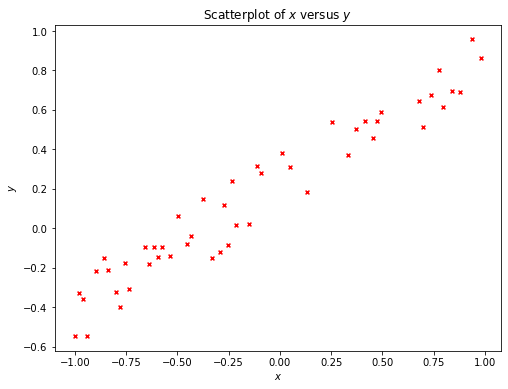

In [3]:
fig = plt.figure(figsize=(8, 6))
plt.scatter(train[:, 0], train[:, 1], marker = 'x', c = 'red', s = 15)
plt.title ('Scatterplot of $x$ versus $y$')
plt.xlabel('$x$')
plt.ylabel('$y$')
plt.show()

## Visualizing the Cost Function

In [4]:
x = np.arange(-5, 5, 0.25)
y = np.arange(-5, 5, 0.25)

X, Y = np.meshgrid(x, y)

# Intermediate values for the calculation of the cost (z-axis)
dot_prod    = (np.dot(X.ravel()[:, np.newaxis], train[:, 0, np.newaxis].T) + Y.ravel()[:, np.newaxis])
squared_err = (dot_prod - train[:, 1, np.newaxis].T) ** 2
mean_sqerr  = (squared_err.mean(axis = 1, keepdims = True) / 2.0).reshape((x.shape[0], y.shape[0]))

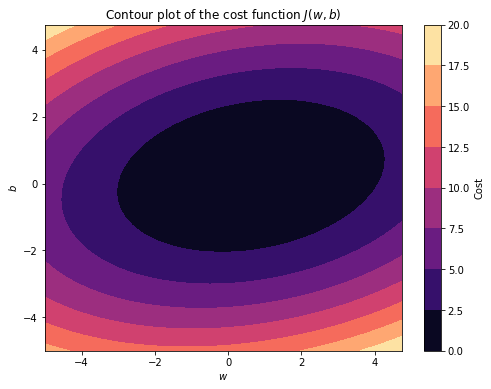

In [5]:
fig, ax = plt.subplots(1, 1)
fig.set_size_inches(8, 6)
plt.contourf(X, Y, mean_sqerr, cmap = 'magma')
plt.xlabel('$w$')
plt.ylabel('$b$')
plt.title ('Contour plot of the cost function $J(w,b)$')
plt.colorbar(label = 'Cost')
plt.show()

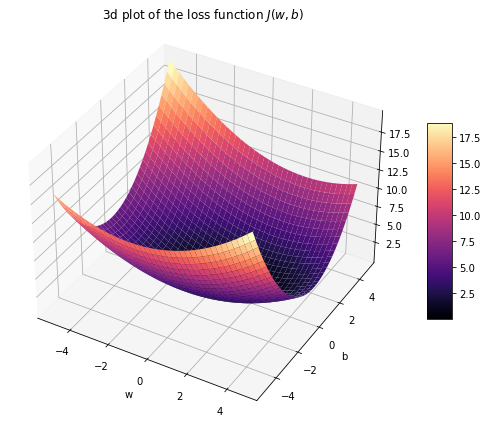

In [6]:
fig = plt.figure(figsize=(8, 6))
ax  = plt.axes(projection = '3d')
ax.view_init(elev = 36)

surface = ax.plot_surface(X, Y, mean_sqerr, cmap = 'magma')
fig.colorbar(surface, shrink = 0.5, aspect = 8)
plt.title('3d plot of the loss function $J(w, b)$')
plt.xlabel('w')
plt.ylabel('b')
plt.tight_layout()
plt.show()

## Gradient Descent
Gradient descent is an iterative algorithm that allows for a linear regression model -- and many other more complex deep learning models -- to arrive at a minimum of any continuous and differentiable function.

The idea is that given $w$ and $b$ which are initialized in any manner, the algorithm will continuously update these parameters in the steepest direction (negative of the gradient) towards a minimum of the cost function. This iteration is repeated until convergence.

Note that since the mean squared error cost function is *convex*, any local minimum is also the global minimum. This is not necessarily true for other cost functions, leading to multiple local minima depending on the initial starting point.

The parameters $w$ and $b$ on the $k$-th iteration are continuously updated (simultaneously) as follows,
$$
\begin{align*}
    w^{[k+1]}&\leftarrow w^{[k]}-\alpha\frac{\partial J(w^{[k]},b^{[k]})}{\partial w^{[k]}}\\
    b^{[k+1]}&\leftarrow b^{[k]}-\alpha\frac{\partial J(w^{[k]},b^{[k]})}{\partial b^{[k]}}
\end{align*}
$$
where $\alpha$ describes the *learning rate*, essentially a hyperparameter.

### Derivation of the Gradient
Given the cost function $J(w,b)$ which has been previously defined as,
$$
J(w,b)=\frac{1}{2m}\sum_{i=1}^{m}\left(\hat{y}^{(i)}-y^{(i)}\right)^2
$$
The gradient of the cost function w.r.t the weights $w$ is
$$
\nabla_{w}J(w,b)=\frac{\partial J(w,b)}{\partial w}
$$
The components of this gradient (where $w_j=w$ in the univariate case and $j\in[1,\ldots,n]$ for the multivariate case) can be calculated as,
$$
\begin{align*}
    \frac{\partial J(w,b)}{\partial w}
    &=\frac{\partial}{\partial w}\left[\frac{1}{2m}\sum_{i=1}^{m}\left(\hat{y}^{(i)}-y^{(i)}\right)^2\right]\\
    &=\frac{1}{2m}\cdot\sum_{i=1}^{m}\left[\frac{\partial}{\partial w}\left(\hat{y}^{(i)}-y^{(i)}\right)^2\right]\\
    &=\frac{1}{2m}\cdot\sum_{i=1}^{m}\left[2\left(\hat{y}^{(i)}-y^{(i)}\right)\cdot\frac{\partial}{\partial w_j}\left(wx^{(i)}+b-y^{(i)}\right)\right]\\
    &=\frac{1}{2m}\sum_{i=1}^{m}\left[2\left(\hat{y}^{(i)}-y^{(i)}\right)\cdot x^{(i)}\right]\\
    &=\frac{1}{m}\sum_{i=1}^{m}(\hat{y}^{(i)}-y^{(i)})\cdot x^{(i)}
\end{align*}
$$

Likewise, $\frac{\partial J(w,b)}{b}$ can be calculated as 
$$
\frac{\partial J(w,b)}{\partial b}=\frac{1}{m}\sum_{i=1}^{m}\left(\hat{y}^{(i)}-y^{(i)}\right)
$$

## Implementation

In [7]:
def plot_against_fitted_line(x_train, y_train, w, b, title):
    x_pred = np.linspace(x_train.min(), x_train.max())
    y_pred = w * x_pred + b

    fig = plt.figure(figsize=(8, 6))
    plt.scatter(train[:, 0], train[:, 1], marker = 'x', c = 'red')
    plt.plot(x_pred, y_pred)
    plt.title (title)
    plt.xlabel('$x$')
    plt.ylabel('$y$')
    plt.legend(['Training set', 'Best fit line'])
    plt.show()

def calc_gradients(w, b, x_train, y_true, y_pred):
    grad_w = np.dot(y_pred - y_true, x_train)
    grad_b = np.mean((y_pred - y_true))
    
    return grad_w, grad_b

def calc_optimal_params_grad_descent(epochs, learning_rate, x_train, y_train):
    w = np.random.randn(1) * 5.0
    b = np.random.randn(1) * 5.0
    L = np.random.randn(epochs)
    
    param_hist = np.zeros((epochs, 2))

    for i in range(epochs):
        y_pred   = w * x_train + b
        cost_val = np.mean((y_pred - y_train) ** 2) / 2.0
        
        param_hist[i, 0] = w[0]
        param_hist[i, 1] = b[0]
        
        grad_w, grad_b = calc_gradients(w, b, x_train, y_train, y_pred)
        grad_w, grad_b
        
        L[i] = cost_val

        w = w - learning_rate * grad_w
        b = b - learning_rate * grad_b    

    return w[0], b[0], L, param_hist

train_x = train[:, 0]
train_y = train[:, 1]

w_gd, b_gd, loss_hist, param_hist = calc_optimal_params_grad_descent(100, 0.1, train_x, train_y)

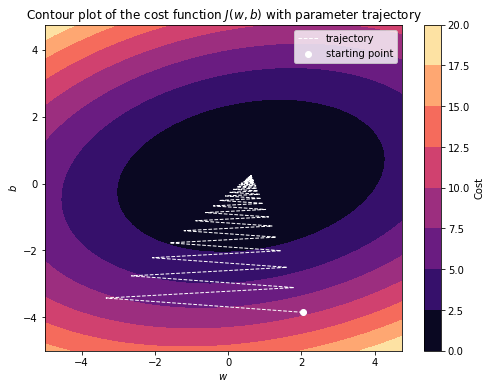

In [8]:
fig, ax = plt.subplots(1, 1)
fig.set_size_inches((8, 6))
plt.contourf(X, Y, mean_sqerr, cmap = 'magma')
plt.xlabel('$w$')
plt.ylabel('$b$')
plt.title ('Contour plot of the cost function $J(w,b)$ with parameter trajectory')
plt.colorbar(label = 'Cost')
plt.plot(param_hist[:, 0], param_hist[:, 1], color = 'white', linewidth = 1.0, linestyle = '--', label = 'trajectory')
plt.scatter(param_hist[0, 0], param_hist[0, 1], color = 'white', label = 'starting point')
plt.legend()
plt.show()

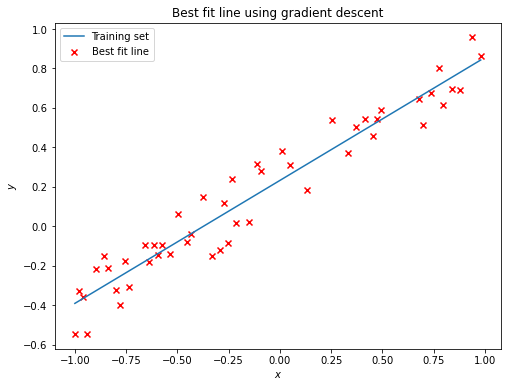

In [9]:
plot_against_fitted_line(train_x, train_y, w_gd, b_gd, 'Best fit line using gradient descent')

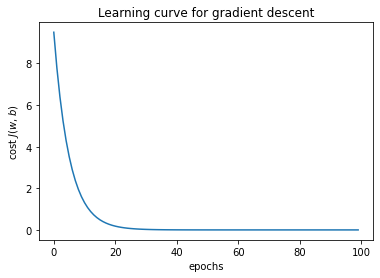

In [10]:
fig = plt.figure()
plt.xlabel('epochs')
plt.ylabel('cost $J(w,b)$')
plt.title ('Learning curve for gradient descent')
plt.plot(loss_hist)
plt.show()

## Direct Solution via System of equations
Given that the mean squared error cost function is a convex function, the minimum can be solved directly by writing the derivatives as a system of equations with two unknowns and finding the solution for $\vec{\theta}=\begin{bmatrix}0, 0\end{bmatrix}^\top$
$$
\begin{align*}
\sum_{i=1}^{m}\left[(w\cdot x^{(i)}+b-y^{(i)})\cdot x^{(i)}\right]&=0\\
\sum_{i=1}^{m}(w\cdot x^{(i)}+b-y^{(i)})       &=0\\
\end{align*}
$$
Distributing the summation and transposing constants to the right hand side
$$
\begin{alignat*}{3}
&(1)\quad w\sum_{i=1}^{m}(x^{(i)})^2&&+b\sum_{i=1}^{m}x^{(i)}&&=\sum_{i=1}^{m}y^{(i)}x^{(i)}\\
&(2)\quad w\sum_{i=1}^{m}x^{(i)}&&+bm&&=\sum_{i=1}^{m}y^{(i)}\\
\end{alignat*}
$$

#### Solving for $w$
Elimination of the second term,
$$
\begin{align*}
w\sum_{i=1}^{m}(x^{(i)})^2+b\sum_{i=1}^{m}x^{(i)}&=\sum_{i=1}^{m}y^{(i)}x^{(i)}\\
-\frac{\sum_{i=1}^{m}x^{(i)}}{m}(w\sum_{i=1}^{m}x^{(i)}+mb       &=\sum_{i=1}^{m}y^{(i)})\\
\end{align*}
$$

$$
\begin{align*}
w\sum_{i=1}^{m}(x^{(i)})^2+b\sum_{i=1}^{m}x^{(i)}&=\sum_{i=1}^{m}y^{(i)}x^{(i)}\\
-w\frac{\left(\sum_{i=1}^{m}x^{(i)}\right)^2}{m}-b\sum_{i=1}^{m}x^{(i)}&=-\frac{\sum_{i=1}^{m}y^{(i)}\sum_{i=1}^{m}x^{(i)}}{m}
\end{align*}
$$

Solving for $w$,
$$
w\left[\frac{m\sum_{i=1}^{m}(x^{(i)})^2-\left(\sum_{i=1}^{m}x^{(i)}\right)^2}{m}\right]=\frac{m\sum_{i=1}^{m}y^{(i)}x^{(i)}-\sum_{i=1}^{m}y^{(i)}\sum_{i=1}^{m}x^{(i)}}{m}
$$

$$
w=\frac{m\sum_{i}y^{(i)}x^{(i)}-\sum_{i}y^{(i)}\sum_{i}x^{(i)}}{m\sum_{i}(x^{(i)})^2-\left(\sum_{i}x^{(i)}\right)^2}
$$

#### Solving for $b$
Solve for $w$ from equation (2) and substitute into equation (1):
$$
w=\frac{\sum_{i}y^{(i)}-bm}{\sum_{i}x^{(i)}}
$$

Solving for $b$,
$$
\begin{align*}
\left(\frac{\sum_{i}y^{(i)}-bm}{\sum_{i}x^{(i)}}\right)\sum_{i}(x^{(i)})^2+b\sum_{i}x^{(i)}&=\sum_{i}y^{(i)}x^{(i)}\\[1em]
\frac{\sum_{i}y^{(i)}\sum_{i}(x^{(i)})^2-mb\sum_{i}(x^{(i)})^2+b\left(\sum_{i}x^{(i)}\right)^2}{\sum_{i}x^{(i)}}&=\sum_{i}y^{(i)}x^{(i)}\\[1em]
\sum_{i}y^{(i)}\sum_{i}(x^{(i)})^2-mb\sum_{i}(x^{(i)})^2+b\left(\sum_{i}x^{(i)}\right)^2&=\sum_{i}y^{(i)}x^{(i)}\cdot\sum_{i}x^{(i)}\\[1em]
-mb\sum_{i}(x^{(i)})^2+b\left(\sum_{i}x^{(i)}\right)^2&=\sum_{i}y^{(i)}x^{(i)}\cdot\sum_{i}x^{(i)}-\sum_{i}y^{(i)}\cdot\sum_{i}(x^{(i)})^2\\[1em]
mb\sum_{i}(x^{(i)})^2-b\left(\sum_{i}x^{(i)}\right)^2&=\sum_{i}y^{(i)}\cdot\sum_{i}(x^{(i)})^2-\sum_{i=1}^{m}y^{(i)}x^{(i)}\cdot\sum_{i}x^{(i)}
\end{align*}
$$
$$
\\[2em]
b=\frac{\sum_{i}y^{(i)}\cdot\sum_{i}(x^{(i)})^2-\sum_{i=1}^{m}y^{(i)}x^{(i)}\cdot\sum_{i}x^{(i)}}{m\sum_{i}(x^{(i)})^2-\left(\sum_{i}x^{(i)}\right)^2}
$$

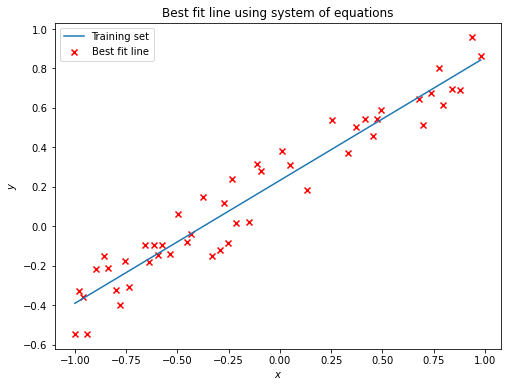

In [11]:
def calc_optimal_params_system_of_eq(x_train, y_train):
    m = x_train.shape[0]

    w_denom = (m * np.sum(x_train ** 2)) - (np.sum(x_train) ** 2)
    w_numer = (m * np.dot(y_train, x_train)) - (np.sum(y_train) * np.sum(x_train))

    w_new = w_numer / w_denom
    w_new

    b_numer = (np.sum(y_train) * np.sum(x_train ** 2)) - (np.dot(y_train, x_train) * np.sum(x_train))
    b_denom = (m * np.sum(x_train ** 2)) - (np.sum(x_train)) ** 2

    b_new = b_numer / b_denom

    return (w_new, b_new)

w_se, b_se = calc_optimal_params_system_of_eq(train_x, train_y)
plot_against_fitted_line(train_x, train_y, w_se, b_se, 'Best fit line using system of equations')

In [12]:
print("Estimated: ({:.5f},{:.5f})".format(w_se, b_se))
print("Descent  : ({:.5f},{:.5f})".format(w_gd, b_gd))
print("True     : ({:.5f},{:.5f})".format(w_true, b_true))

Estimated: (0.62332,0.23228)
Descent  : (0.62347,0.23210)
True     : (0.62000,0.19000)
